## 손글씨 숫자 식별 모델
- 데 이 터 : MNIST 
- 학습모델 : 신경망 모델
- 동작 : 0~9 사이 숫자 판별

In [1]:
import tensorflow as ft

In [2]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np

### [1] 데이터 로딩 및 준비

In [3]:
(train_input, train_target), (test_input, test_target) = load_data()

In [4]:
print(train_input.shape, test_input.shape)

(60000, 28, 28) (10000, 28, 28)


In [5]:
train_target.shape

(60000,)

In [6]:
# 검증용 데이터 셋 준비

In [7]:
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, stratify=train_target)

### [2] 데이터 전처리
- 수치 데이터 => 스케일링
- 범주형 데이터 => 원핫 인코딩

In [8]:
train_input[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
# 이미지 데이터의 픽셀값 즉 특성(Feature) 0.0~1.0으로 스케일링
train_input = train_input/255.0 # numpy 브로드캐스팅
val_input = val_input/255.0
test_input = test_input/255.0

In [10]:
# 타겟 라벨 => OHE변환
from sklearn.preprocessing import OneHotEncoder

In [11]:
encoder = OneHotEncoder()

In [12]:
encoder.fit(train_target.reshape(-1,1))
train_target=encoder.transform(train_target.reshape(-1,1))

In [13]:
test_target=encoder.transform(test_target.reshape(-1,1))
val_target=encoder.transform(val_target.reshape(-1,1))

In [14]:
train_target = train_target.toarray()

In [15]:
test_target = test_target.toarray()
val_target = val_target.toarray()

In [16]:
train_target[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [17]:
test_target[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [18]:
val_target[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

### [3] 모델 생성
- (1) 모델 구성
- (2) 모델 생성

#### [3-1] 모델 구성
- 입력 데이터 : 784 => 28 * 28 dense layer >> 1차원으로 밖에 받지 못함
- 출력 데이터 : 10  => 0 ~ 9 숫자 라벨
- 학습 방  법 : 분류 = 다중분류

In [19]:
from tensorflow.keras.layers import Dropout

In [20]:
model = Sequential(name='MNIST')

In [21]:
# Layer 생성 => Node(퍼셉트론, 뉴런) 갯수, 활성화 함수, [옵션] input_shape=
model.add(Dense(100, activation='relu', input_shape=(28*28,)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [22]:
model.summary()

Model: "MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


#### [3-2] 모델 생성

- loss
    - 이진분류 : binary_crossentropy
    - 다중분류 : parse_categorical_crossentropy, categorical_crossentropy
- optimizer 기법 => 'rmsprop'
- matrics 평가항목 => 'loss'

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### [4] 학습

In [24]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [25]:
stopCB=EarlyStopping(monitor='val_loss', patience=2)

In [26]:
MODEL_PATH='model.{epoch:02d}-{val_loss:.2f}.h5'
modelCB=ModelCheckpoint(filepath=MODEL_PATH, save_best_only=True)

In [27]:
train_input = train_input.reshape(-1,28*28)

In [28]:
val_input = val_input.reshape(-1,28*28)

In [29]:
val_input.shape

(15000, 784)

In [30]:
val_target.shape

(15000, 10)

In [31]:
his = model.fit(train_input, train_target, epochs=10, validation_data=(val_input,val_target), callbacks=[stopCB,modelCB])

Epoch 1/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.4566 - accuracy: 0.8605 - val_loss: 0.1970 - val_accuracy: 0.9402
Epoch 2/10
1407/1407 [==============================] - 2s 2ms/step - loss: 0.2695 - accuracy: 0.9176 - val_loss: 0.1556 - val_accuracy: 0.9529
Epoch 3/10
1407/1407 [==============================] - 2s 2ms/step - loss: 0.2293 - accuracy: 0.9286 - val_loss: 0.1270 - val_accuracy: 0.9627
Epoch 4/10
1407/1407 [==============================] - 2s 2ms/step - loss: 0.2051 - accuracy: 0.9362 - val_loss: 0.1214 - val_accuracy: 0.9627
Epoch 5/10
1407/1407 [==============================] - 2s 2ms/step - loss: 0.1889 - accuracy: 0.9422 - val_loss: 0.1127 - val_accuracy: 0.9665
Epoch 6/10
1407/1407 [==============================] - 2s 2ms/step - loss: 0.1788 - accuracy: 0.9438 - val_loss: 0.1105 - val_accuracy: 0.9666
Epoch 7/10
1407/1407 [==============================] - 2s 2ms/step - loss: 0.1670 - accuracy: 0.9474 - val_loss: 0.1068 - val_accuracy:

In [32]:
import matplotlib.pyplot as plt

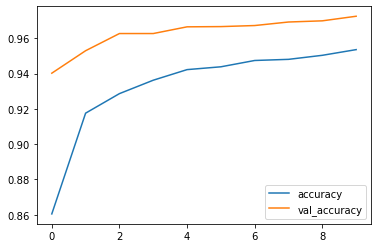

In [33]:
plt.plot(his.epoch, his.history['accuracy'], label = 'accuracy')
plt.plot(his.epoch, his.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

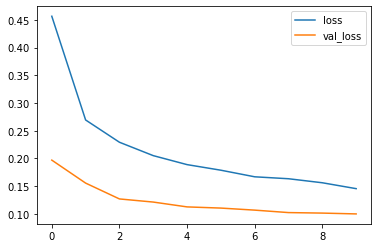

In [34]:
plt.plot(his.epoch, his.history['loss'], label = 'loss')
plt.plot(his.epoch, his.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

### [5] 평가
- evaluate() 메서드
    - test data, target
    - 반환값 : loss, metrics에서 지정한 성능평가 항목
- test 데이터는 마지막에

In [35]:
test_result = model.evaluate(test_input.reshape(-1,28*28), test_target)

313/313 [==============================] - 0s 791us/step - loss: 0.0959 - accuracy: 0.9726


### [6] 테스트/예측

In [36]:
pre_label=model.predict(test_input[0].reshape(-1,28*28))

1/1 [==============================] - 0s 69ms/step


In [37]:
np.round(pre_label,2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [38]:
test_target[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [39]:
from tensorflow.keras.utils import plot_model

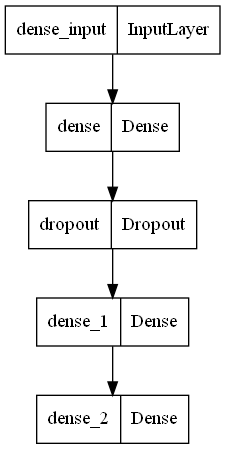

In [40]:
plot_model(model)